<a href="https://colab.research.google.com/github/sohil344/Deep_Learning/blob/main/Regularization_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X,y=make_moons(100,noise=0.25,random_state=2)

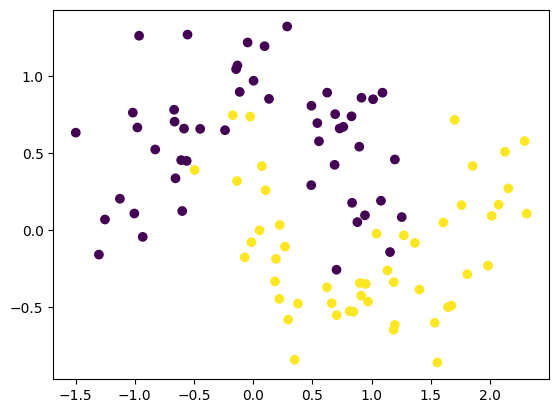

In [3]:
#created and plotted datasets
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [4]:
model1=Sequential()

model1.add(Dense(128,input_dim=2,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()
#created 1st model without regularization

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [10]:
adam=Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

history1=model1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

#compiling anf fiting model

In [6]:
#pip install mlxtend --upgrade --no-deps

9600/9600 [==============================] - 23s 2ms/step


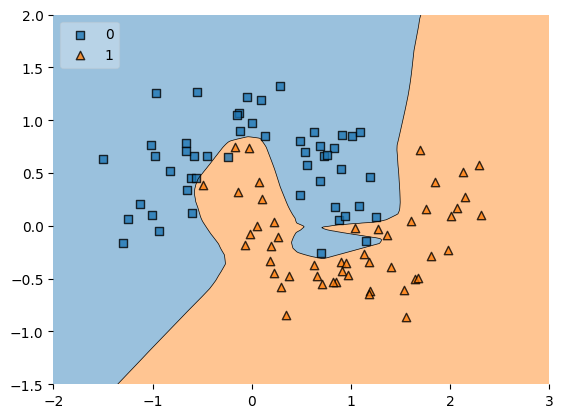

In [11]:
plot_decision_regions(X, y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

#Plotting the decision region, clearly in plot we can see that model is trying to capture all the
#points and this can be  the case of overfitting

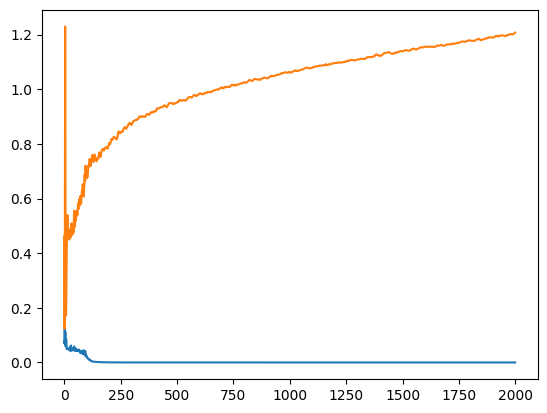

In [12]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])\

#From this Plot loss Vs Val_loss we can clearly say that model has overfitted
#since the model on trianing dataset that is blue line indicates as epochs increases the loss is deceeasing
#but this is not in case of val loss since here test dats is used and this data is new so model is unable to give good reduction in loss for test data

In [13]:
model2=Sequential()

model2.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

#Model is trained using regularization of l1 with value of 0.001 to overcome the overfitting

#Regularization add the penality term to the weight updation equation which controls the updated weight and hence by controlling the optimized weight we are
#trying to avoid the overfitting condition of model


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history2=model2.fit(X,y,epochs=2000,validation_split=0.2)

#Model is compiled and fitted


Epoch 1/2000
3/3 [==============================] - 1s 111ms/step - loss: 0.1866 - accuracy: 0.9625 - val_loss: 0.5064 - val_accuracy: 0.9500
Epoch 2/2000
3/3 [==============================] - 0s 20ms/step - loss: 0.1335 - accuracy: 0.9625 - val_loss: 0.5474 - val_accuracy: 0.9500
Epoch 3/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.1130 - accuracy: 0.9750 - val_loss: 0.4617 - val_accuracy: 0.9500
Epoch 4/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.1230 - accuracy: 0.9750 - val_loss: 0.3834 - val_accuracy: 0.9500
Epoch 5/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.0966 - accuracy: 0.9750 - val_loss: 0.4112 - val_accuracy: 0.9500
Epoch 6/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.1212 - accuracy: 0.9750 - val_loss: 0.3939 - val_accuracy: 0.9500
Epoch 7/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.1042 - accuracy: 0.9750 - val_loss: 0.4730 - val_accuracy: 0.9500
Epoch 8/2000

9600/9600 [==============================] - 14s 1ms/step


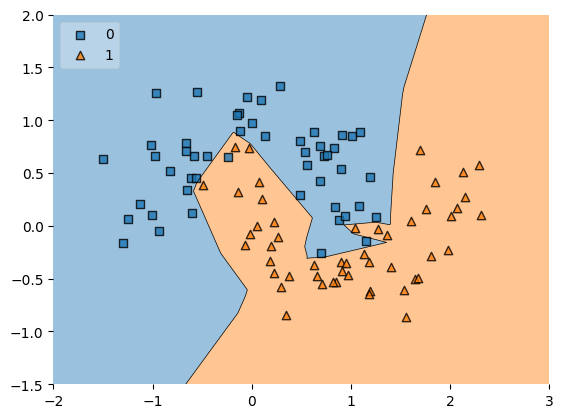

In [23]:
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()



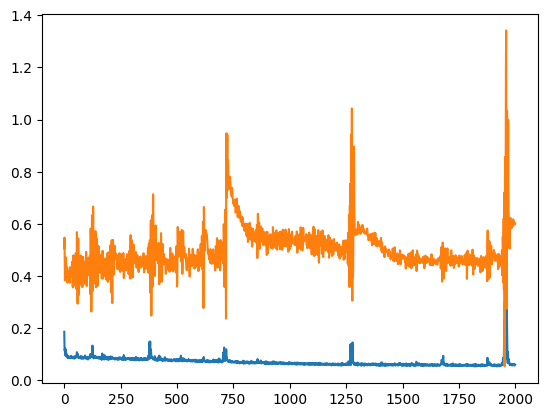

In [25]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

#Below loss Vs Val_loss plot shows us that the loss is reduced in both the train and test data in similar manner.